In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb 
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize']=(16,9)
plt.style.use('ggplot')

In [2]:
dataframe=pd.read_csv('C:/Users/Lore/Desktop/PROYECTOS/Python/k-means clustering rasgos de personalidad/analisis.csv')

In [3]:
dataframe.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


Usuario(el nombre en twitter)
*"op"= Grado de apertura mental a nuevas experiencias
*"co" = Grado de orden, prolijidad, organización
*"ex"= Grado de timidez, solitario o participación ante el grupo social 
*"ag"= Grado de empatía con los demás, temperamento 
*"ne"= Grado de neuroticismo, nerviosismo, irritabilidadm seguridad en si mismo
*wordcount= Cantidad promedio de palabras usadas en sus tweets
*Categoría = Actividad laboral del usuario(actor, cantante, etc)


#### Información estadística 

In [4]:
dataframe.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


#### contiene diferenciadas 9 categorías-actividades laborales
1. Actor/actriz
2. Cantante
3. Modelo 
4. Tv, series
5. Radio
6. Tecnología
7. Deportes
8. politica 
9. Escritor 


In [5]:
print(dataframe.groupby('categoria').size())

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


#### Visualización de datos 

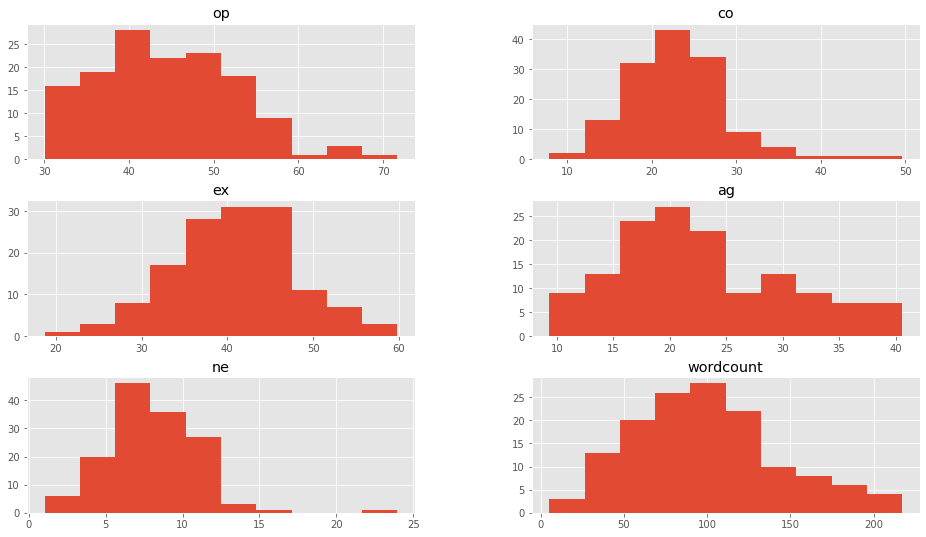

In [7]:
dataframe.drop(['categoria'],1).hist()
plt.show()

#### seleccionamos 3 dimensiones : op, ex y ag y las cruzamos para ver si nos dan alguna pista de su agrupación y la relación con sus categorías. 

C:\Users\Lore\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


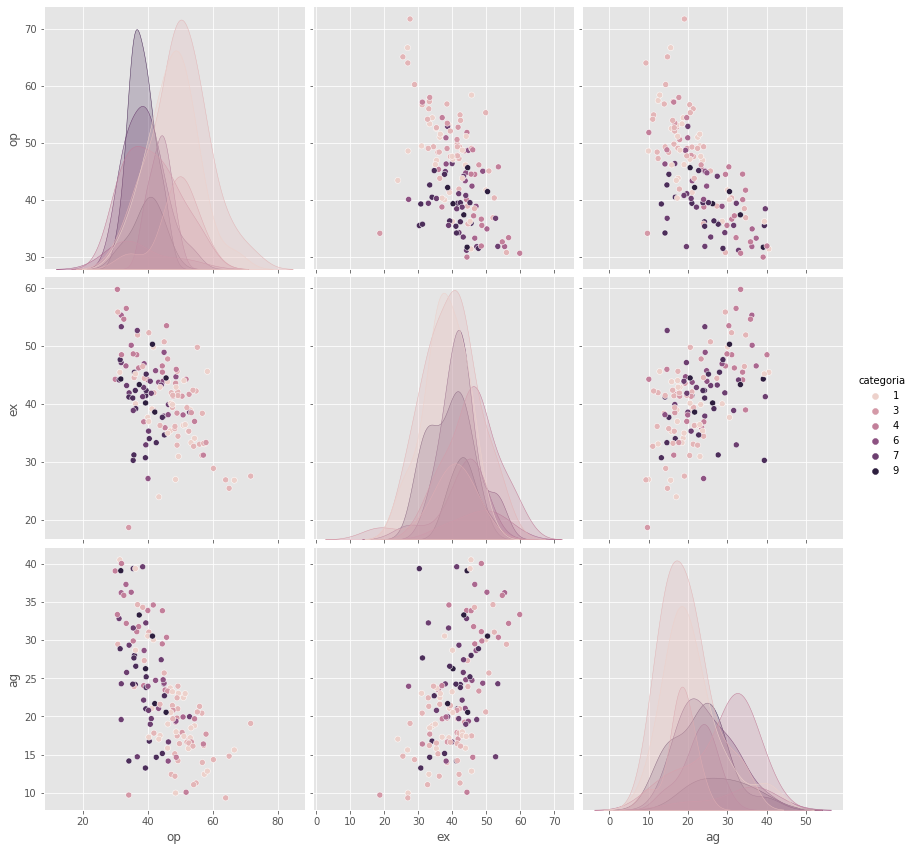

In [8]:
sb.pairplot(dataframe.dropna(),hue='categoria',size=4,vars=["op","ex","ag"],kind='scatter')

#### Definimos la entrada 

In [9]:
x=np.array(dataframe[["op","ex","ag"]])
y=np.array(dataframe['categoria'])
x.shape 

(140, 3)

Obtener un valor de K

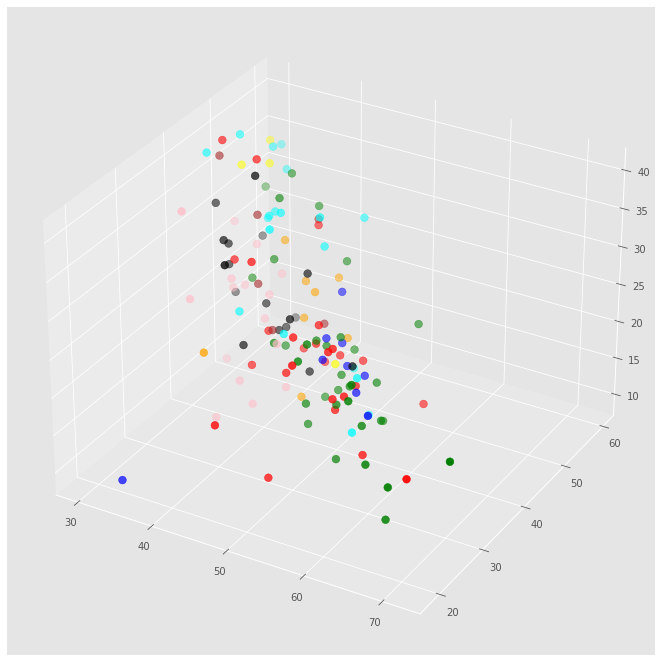

In [10]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=asignar,s=60)

C:\Users\Lore\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


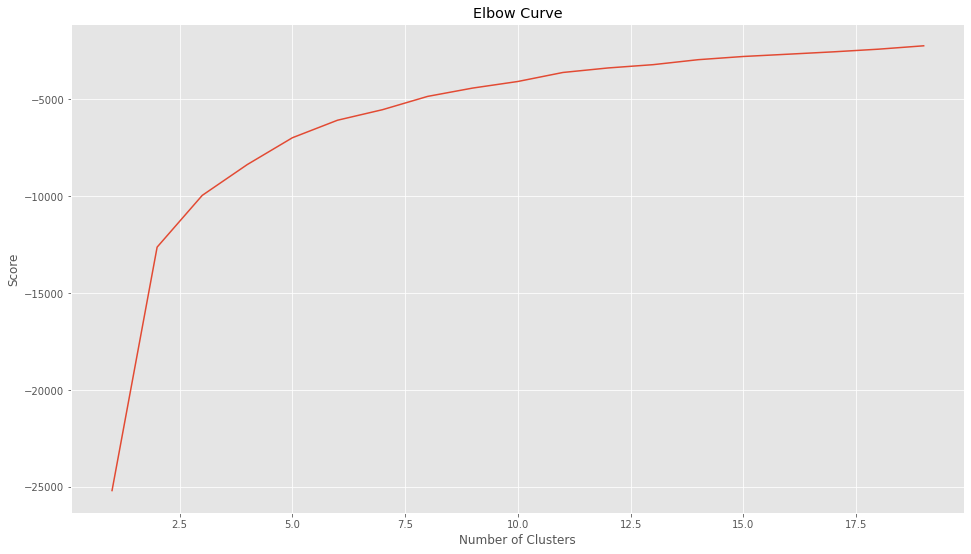

In [11]:

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(x).score(x) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=5).fit(x)
centroids = kmeans.cluster_centers_
print(centroids)

[[43.3644665  31.89755772 19.50586767]
 [35.90241306 47.56828232 33.58748762]
 [39.94672753 42.82349753 23.72594859]
 [59.25320707 31.29770653 15.9896352 ]
 [49.99285115 40.87133549 17.47411785]]


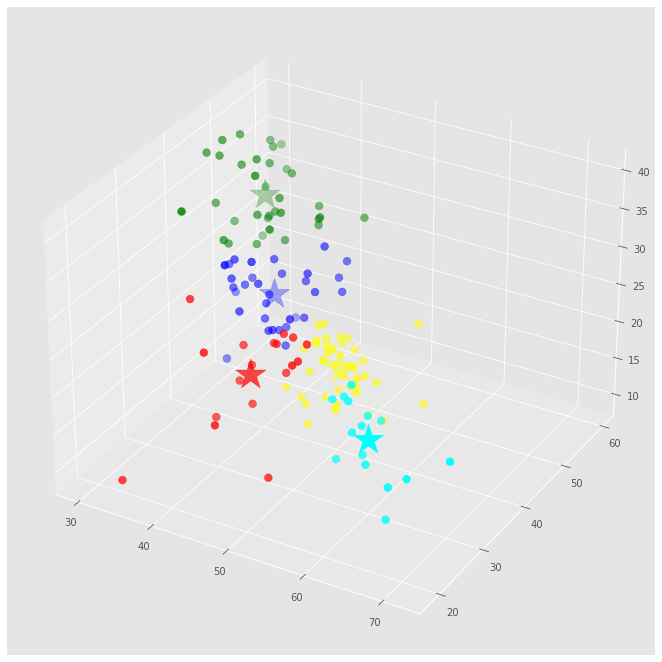

In [18]:
# predicting the clusters 
labels=kmeans.predict(x)
# Getting the cluster centers
c = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(x[:, 0],x[:, 1],x[:, 2], c=asignar, s=60)
ax.scatter(c[:, 0],c[:, 1],c[:, 2], marker='*',c=colores, s=1000)

NameError: name 'c' is not defined

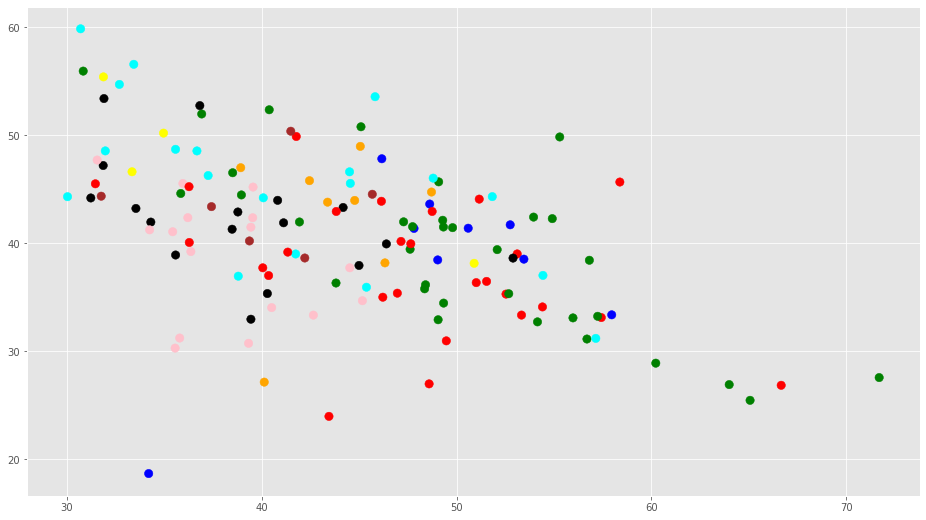

In [13]:
# getting the values and plotting it
f1=dataframe['op'].values
f2=dataframe['ex'].values

plt.scatter(f1,f2, c=asignar, s=70)
plt.scatter(c[:, 0], c[:, 1], marker='*', c=colores, s=1000)
plt.show()

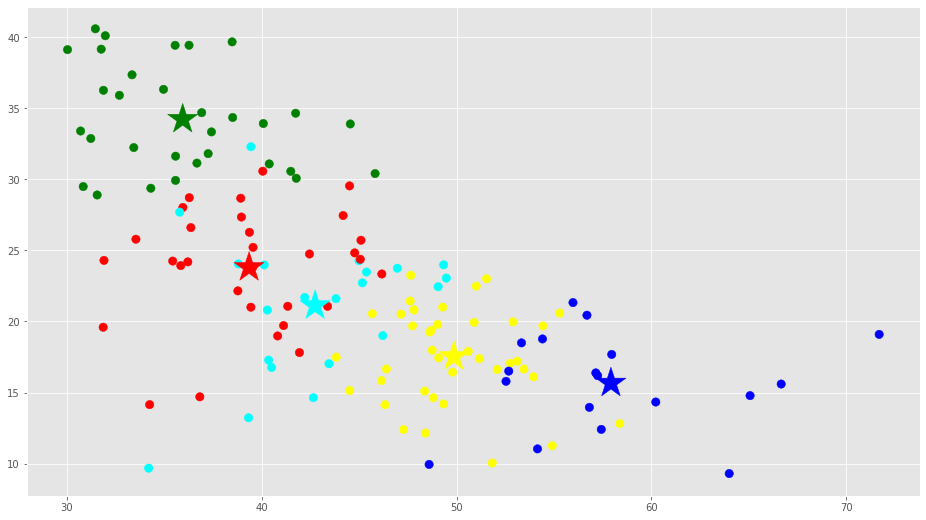

In [36]:
# getting the values an plotting it 
f1= dataframe['op'].values
f2= dataframe['ag'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(c[:, 0],c[:, 2], marker='*', c=colores, s=1000)
plt.show()

NameError: name 'c' is not defined

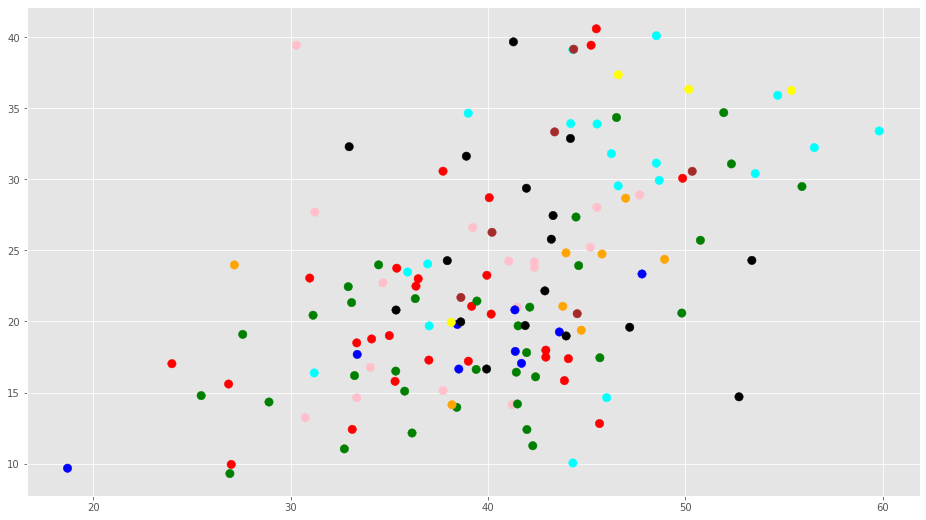

In [14]:
f1= dataframe['ex'].values
f2= dataframe['ag'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(c[:, 1], c[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [19]:

copy =  pd.DataFrame()
copy['usuario']=dataframe['usuario'].values
copy['categoria']=dataframe['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo


,color,cantidad
0,red,18
1,green,34
2,blue,32
3,cyan,15
4,yellow,41


In [26]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]

diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo


,categoria,cantidad
0,0,NaN
1,1,6.0
2,2,3.0
3,3,1.0
4,4,1.0
5,5,NaN
6,6,1.0
7,7,1.0
8,8,5.0
9,9,NaN


In [27]:
# vemos el representante del grupo, el usuario cercano a su centroid
closest,_=pairwise_distances_argmin_min(kmeans.cluster_centers_,x)
closest

array([123,  98,  64,  82,  21], dtype=int64)

In [28]:
users=dataframe['usuario'].values
for row in closest:
    print(users[row])

SJP
maria_patino
ierrejon
JudgeJudy
carmenelectra


Clasificar nuevas muestras 

Podemos agrupar y etiquetar nuevos usuarios twitter con sus caracteristicas y clasificarlos

In [29]:
x_new=np.array([[45.92,57.74,15.66]])# David guetta
new_labels=kmeans.predict(x_new)
print(new_labels)

[4]
